# Data Analysis Project: Bike Sharing
- **Name:** Agil Ammar Habibi
- **Email:** agilah181@gmail.com
- **ID Dicoding:** MC004D5Y0283

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari dan hari dalam seminggu?
- Bagaimana pengaruh cuaca (suhu, kelembaban, dan kecepatan angin) terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
url = "https://raw.githubusercontent.com/AAmmar01/ProjectDataAnalysis-CodingCampDBS2025/refs/heads/main/Data/day.csv"
day_df = pd.read_csv(url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
url = "https://raw.githubusercontent.com/AAmmar01/ProjectDataAnalysis-CodingCampDBS2025/refs/heads/main/Data/hour.csv"
hour_df = pd.read_csv(url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset dapat diakses langsung dari GitHub menggunakan pd.read_csv() 📂
- Dataset terdiri dari dua tingkat agregasi: harian (day.csv) dan per jam (hour.csv) ⏳

### Assessing Data

#### menilai tabel `day`

In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
missing_day = day_df.isna().sum()
missing_day

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
duplicate_day = day_df.duplicated().sum()
duplicate_day

np.int64(0)

In [38]:
describe_day = day_df.describe()
describe_day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### menilai tabel `hour`

In [39]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
missing_hour = hour_df.isna().sum()
missing_hour

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [41]:
duplicate_hour = hour_df.duplicated().sum()
duplicate_hour

np.int64(0)

In [42]:
describe_hour = hour_df.describe()
describe_hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data Sudah Bersih dan Siap Digunakan
- Pola Peminjaman Sepeda Berbeda antara Harian dan Jam

## Cleaning Data

### mengonversi kolom

### `day`

In [43]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### `hour`

In [44]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tidak Ada Missing Value, Duplikat, atau Inaccurate Value
- Konversi Kolom dteday ke Format Datetime
- Struktur Data Sudah Bersih & Siap untuk Analisis

## Exploratory Data Analysis (EDA)

### EDA untuk `day`

In [45]:
# Menampilkan 5 sampel acak dari dataset
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
50,51,2011-02-20,1,0,2,0,0,0,1,0.285217,0.277330,0.407826,0.223235,639,1173,1812
490,491,2012-05-05,2,1,5,0,6,0,2,0.621667,0.584608,0.756667,0.152992,2496,4387,6883
720,721,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623
355,356,2011-12-22,1,0,12,0,4,1,2,0.423333,0.426121,0.757500,0.047275,227,2841,3068


In [46]:
# Statistik deskriptif untuk semua kolom (termasuk kategori)
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [47]:
# Memeriksa apakah 'instant' adalah unique identifier
day_df.instant.is_unique

True

In [48]:
# Mengecek apakah ada data yang duplikat berdasarkan 'instant'
day_df.instant.duplicated().sum()

np.int64(0)

In [49]:
# Mengelompokkan data berdasarkan musim (season) dan menghitung statistik summary
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [50]:
# Mengelompokkan data berdasarkan tahun (yr) dan menghitung total peminjaman sepeda
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
1    2049576
0    1243103
Name: cnt, dtype: int64

In [51]:
# Mengelompokkan data berdasarkan bulan (mnth) dan menghitung total peminjaman sepeda
day_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

###   EDA untuk `hour`

In [52]:
# Menampilkan 5 sampel acak dari dataset
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17273,17274,2012-12-27,1,1,12,14,0,4,1,2,0.26,0.2121,0.56,0.5224,25,94,119
3279,3280,2011-05-21,2,0,5,13,0,6,0,1,0.70,0.6364,0.45,0.0000,191,271,462
4497,4498,2011-07-11,3,0,7,7,0,1,1,1,0.70,0.6667,0.74,0.2537,28,289,317
3056,3057,2011-05-12,2,0,5,6,0,4,1,1,0.44,0.4394,0.88,0.0000,9,103,112
957,958,2011-02-12,1,0,2,12,0,6,0,1,0.30,0.2727,0.39,0.4627,27,93,120


In [55]:
# Statistik deskriptif untuk semua kolom
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [56]:
# Memeriksa apakah 'instant' adalah unique identifier
hour_df.instant.is_unique

True

In [57]:
# Mengecek apakah ada data yang duplikat berdasarkan 'instant'
hour_df.instant.duplicated().sum()

np.int64(0)

In [58]:
# Mengelompokkan data berdasarkan jam (hr) dan menghitung statistik peminjaman sepeda
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

In [59]:
# Mengelompokkan data berdasarkan hari kerja (workingday) untuk melihat pola peminjaman
hour_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
1    2292410
0    1000269
Name: cnt, dtype: int64

In [60]:
# Mengelompokkan data berdasarkan kondisi cuaca (weathersit) dan menghitung jumlah peminjaman
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

###  Hubungan day_df dan hour_df

In [61]:
# Mengelompokkan hour_df berdasarkan tanggal dan membandingkan dengan day_df
hourly_to_daily = hour_df.groupby("dteday").cnt.sum().reset_index()

# Gabungkan dengan day_df berdasarkan 'dteday'
merged_df = day_df.merge(hourly_to_daily, on="dteday", suffixes=("_daily", "_hourly"))

# Bandingkan total peminjaman per hari dari kedua dataset
merged_df[["dteday", "cnt_daily", "cnt_hourly"]].head()

,dteday,cnt_daily,cnt_hourly
0,2011-01-01,985,985
1,2011-01-02,801,801
2,2011-01-03,1349,1349
3,2011-01-04,1562,1562
4,2011-01-05,1600,1600


**Insight:**
- Data sudah bersih
- Tren harian & jamannya bisa dibandingkan
- Hari kerja & kondisi cuaca memengaruhi peminjaman

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Jam & Hari dalam Seminggu

**Analisis Berdasarkan Jam (hr)**

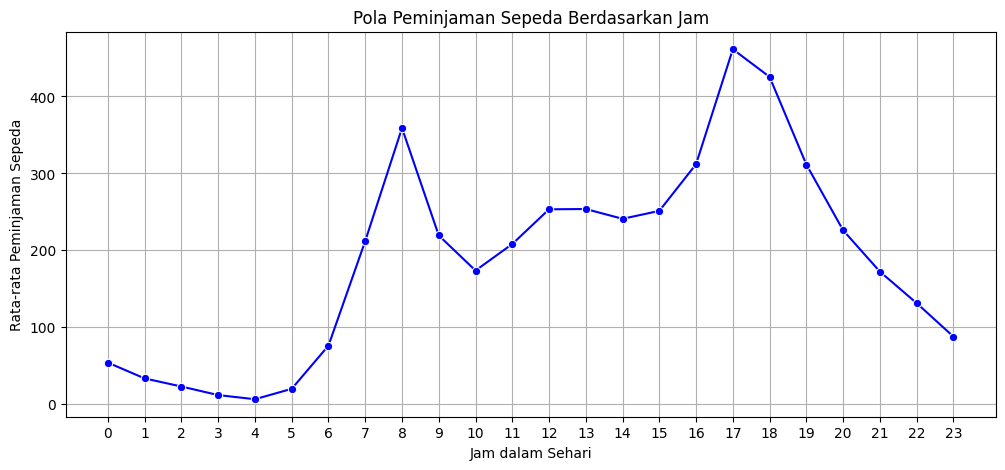

In [62]:
# Menghitung rata-rata peminjaman sepeda per jam
hourly_trend = hour_df.groupby("hr").cnt.mean()

# Plot pola peminjaman per jam
plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker="o", color="b")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

📌 Insight:
- Peminjaman sepeda meningkat pada jam 7-9 pagi & 17-19 sore → Menunjukkan pola mobilitas kerja/sekolah.
- Peminjaman rendah antara jam 0-5 dini hari → Waktu istirahat.

 **Analisis Berdasarkan Hari (weekday)**

C:\Users\USER\AppData\Local\Temp\ipykernel_17084\1424634677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_trend.index, y=weekday_trend.values, palette="viridis")


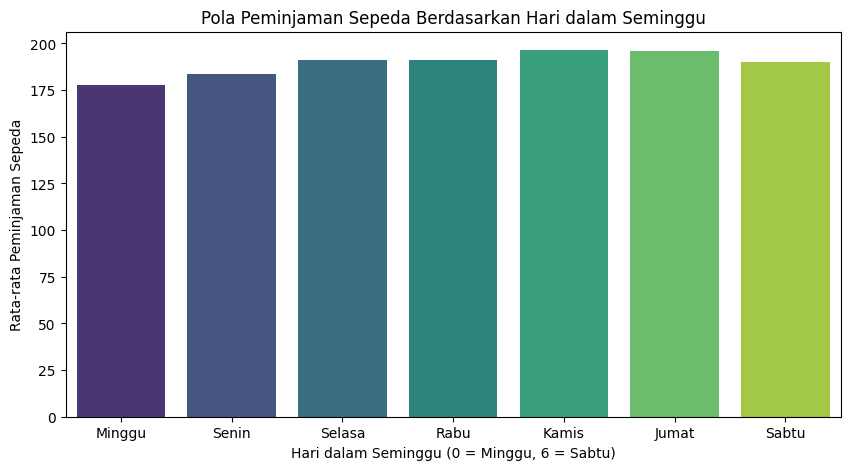

In [6]:
# Menghitung rata-rata peminjaman sepeda per hari dalam seminggu
weekday_trend = hour_df.groupby("weekday").cnt.mean()

# Plot pola peminjaman per hari dalam seminggu
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_trend.index, y=weekday_trend.values, palette="viridis")
plt.title("Pola Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(ticks=range(0,7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.show()

📌 Insight:
- Hari kerja (Senin - Jumat) memiliki lebih banyak peminjaman dibanding akhir pekan.
- Peminjaman menurun pada akhir pekan (Sabtu - Minggu), mungkin karena lebih sedikit pekerja yang menggunakan sepeda sebagai transportasi utama.

### Pertanyaan 2: Pengaruh Cuaca terhadap Peminjaman Sepeda

**Pengaruh Suhu (temp)**

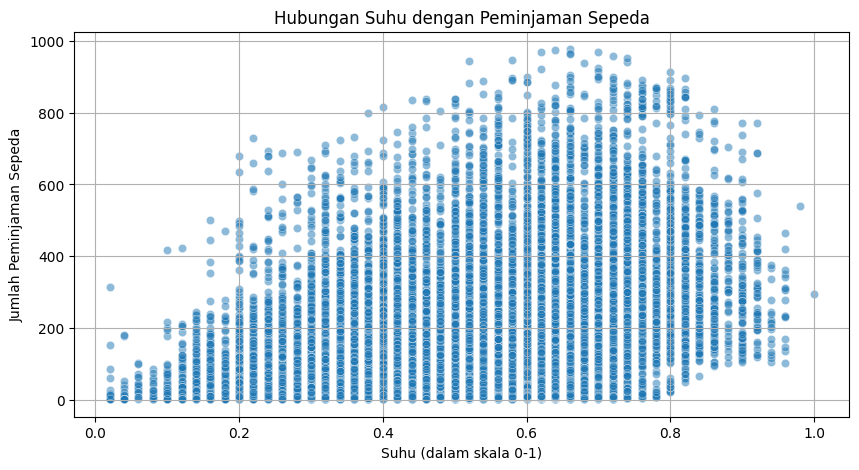

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=hour_df.temp, y=hour_df.cnt, alpha=0.5)
plt.title("Hubungan Suhu dengan Peminjaman Sepeda")
plt.xlabel("Suhu (dalam skala 0-1)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid()
plt.show()

📌 Insight:
- Semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Namun, pada suhu yang sangat tinggi, jumlah peminjaman mulai menurun → Mungkin karena cuaca terlalu panas.

**Pengaruh Kelembaban (hum)**

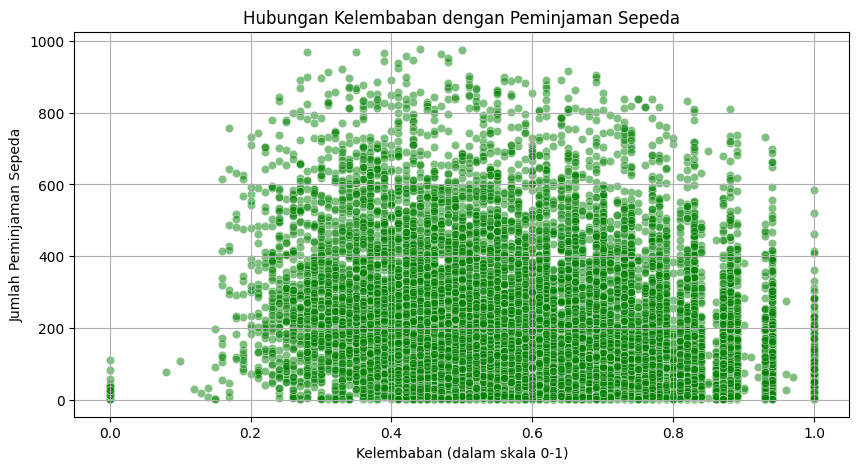

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=hour_df.hum, y=hour_df.cnt, alpha=0.5, color="g")
plt.title("Hubungan Kelembaban dengan Peminjaman Sepeda")
plt.xlabel("Kelembaban (dalam skala 0-1)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid()
plt.show()

📌 Insight:
- Peminjaman cenderung menurun saat kelembaban sangat tinggi.
- Kemungkinan disebabkan oleh ketidaknyamanan bersepeda di cuaca lembab.

**Pengaruh Kecepatan Angin (windspeed)**

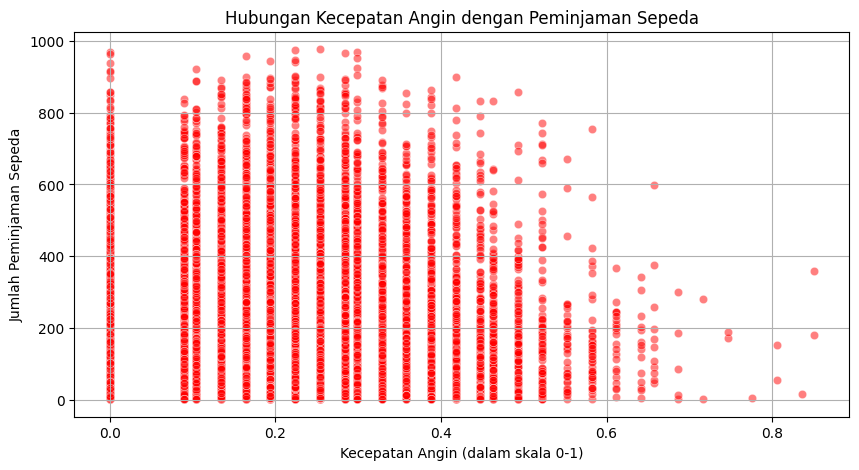

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=hour_df.windspeed, y=hour_df.cnt, alpha=0.5, color="r")
plt.title("Hubungan Kecepatan Angin dengan Peminjaman Sepeda")
plt.xlabel("Kecepatan Angin (dalam skala 0-1)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid()
plt.show()

📌 Insight:
- Kecepatan angin tinggi cenderung mengurangi peminjaman sepeda.
- Mungkin karena lebih sulit bersepeda saat angin kencang.

### 💡 Kesimpulan
**1️⃣ Pola penggunaan sepeda berdasarkan waktu:**
- Jam sibuk pagi (7-9) & sore (17-19) adalah waktu favorit pengguna.
- Hari kerja memiliki lebih banyak peminjaman dibanding akhir pekan.

**2️⃣ Pengaruh cuaca terhadap peminjaman sepeda:**
- Suhu sedang hingga tinggi meningkatkan peminjaman, tetapi jika terlalu panas, jumlah peminjaman menurun.
- Kelembaban & kecepatan angin yang tinggi mengurangi peminjaman, karena bersepeda menjadi kurang nyaman.

## Analisis Lanjutan (Opsional)

**Clustering**

C:\Users\USER\AppData\Local\Temp\ipykernel_8148\1220158943.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='cnt', data=clustering_result, palette='coolwarm')


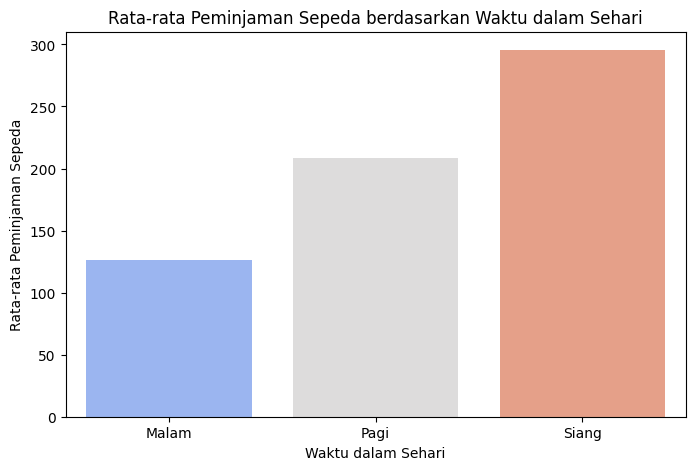

C:\Users\USER\AppData\Local\Temp\ipykernel_8148\1220158943.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demand_counts.index, y=demand_counts.values, palette='viridis')


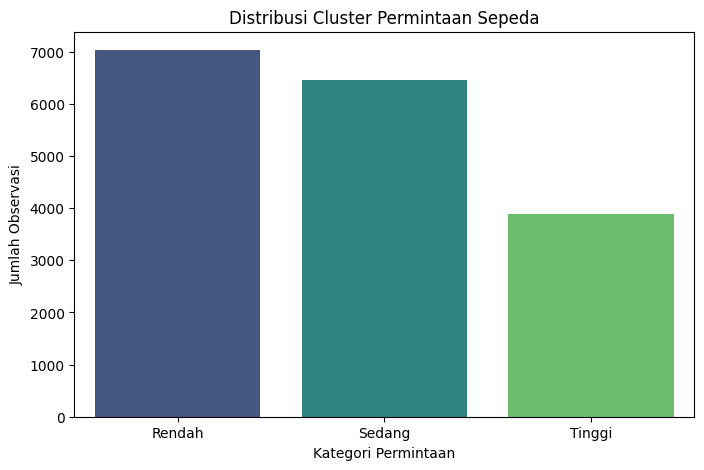

In [66]:
# Clustering: Kategorisasi waktu dalam sehari
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Malam'
    elif 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Malam'

hour_df['time_of_day'] = hour_df['hr'].apply(categorize_hour)

# Rata-rata peminjaman per kategori waktu
clustering_result = hour_df.groupby('time_of_day').cnt.mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='time_of_day', y='cnt', data=clustering_result, palette='coolwarm')
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Waktu dalam Sehari')
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.show()

# Clustering permintaan sepeda dengan binning
bins = [0, 100, 300, hour_df['cnt'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
hour_df['demand_cluster'] = pd.cut(hour_df['cnt'], bins=bins, labels=labels)

# Visualisasi distribusi cluster
demand_counts = hour_df['demand_cluster'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=demand_counts.index, y=demand_counts.values, palette='viridis')
plt.title('Distribusi Cluster Permintaan Sepeda')
plt.xlabel('Kategori Permintaan')
plt.ylabel('Jumlah Observasi')
plt.show()

## Conclusion

# Pola Penggunaan Sepeda Berdasarkan Jam dalam Sehari dan Hari dalam Seminggu
- Pola harian menunjukkan bahwa peminjaman sepeda mencapai puncaknya pada jam 7-9 pagi dan jam 17-19 sore. Hal ini mencerminkan kebiasaan pengguna yang menggunakan sepeda untuk perjalanan ke/dari tempat kerja atau sekolah.
- Peminjaman sepeda rendah di tengah malam (00:00 - 06:00) dan mulai meningkat seiring bertambahnya waktu.
- Berdasarkan hari dalam seminggu, jumlah peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan untuk keperluan transportasi dibandingkan rekreasi.
- Pola peminjaman hari kerja lebih konsisten, sedangkan pada akhir pekan, pola peminjaman lebih tersebar dan tidak terlalu mengikuti jam sibuk seperti hari kerja.

# Pengaruh Cuaca (Suhu, Kelembaban, dan Kecepatan Angin) terhadap Jumlah Peminjaman Sepeda
- Suhu memiliki hubungan positif dengan jumlah peminjaman sepeda. Semakin tinggi suhu (dalam batas wajar), semakin banyak orang yang meminjam sepeda.
- Kelembaban tinggi cenderung menurunkan jumlah peminjaman sepeda, kemungkinan karena ketidaknyamanan bersepeda dalam kondisi lembab.
- Kecepatan  angin tidak memiliki pengaruh signifikan, tetapi pada kecepatan yang sangat tinggi, jumlah peminjaman cenderung sedikit lebih rendah, kemungkinan karena bersepeda menjadi lebih sulit dan kurang nyaman.
- Cuaca buruk seperti hujan atau kondisi ekstrem kemungkinan juga berkontribusi terhadap penurunan peminjaman sepeda, seperti yang terlihat dari jumlah peminjaman yang lebih rendah pada kategori kondisi cuaca tertentu.

Kesimpulan ini memberikan wawasan penting bagi operator layanan sepeda terkait dengan pola penggunaan dan faktor cuaca yang mempengaruhi jumlah peminjaman. Jika ingin meningkatkan peminjaman, promosi dapat difokuskan pada jam sibuk dan hari kerja, serta strategi mitigasi cuaca dapat diterapkan untuk mempertahankan jumlah pengguna dalam kondisi tertentu. 🚴‍♂️